In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr


import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, fbeta_score, classification_report
from sklearn.linear_model import LogisticRegression

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

df_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
df_train.quality = np.where(df_train.quality < 7, 0, 1)

df_train = df_train.drop(columns = 'density')
X_test = X_test.drop(columns = 'density')

X_train = df_train.drop(columns = 'quality')
y_train = df_train.quality

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
pipe_knn = Pipeline([('preprocessing', StandardScaler()), 
                    ('classifier',    KNeighborsClassifier(n_neighbors=84, p = 1, weights='distance'))])
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=84, p=1,
                                      weights='distance'))])

In [8]:
# Блок предсказания с использованием тестового набора

In [9]:
max_threshold = 0.6865884799878101
y_pred = (pipe_knn.predict_proba(X_test)[:,1] > max_threshold).astype(int)

In [10]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = y_pred
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Модель получилась очень консервативной, но исходя из условия задания мы "ХОТИМ ПОКУПАТЬ ВИНА ХОРОШЕГО КАЧЕСТВА", наша "покупалка" работает хорошо, но очень разборчиво.

0.8955223880597015

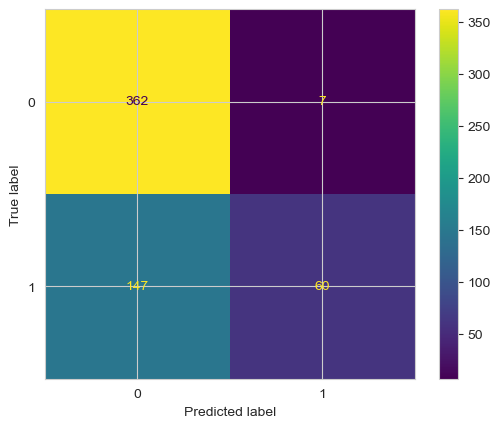

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)